# Project - Predicting Employee Churn

## Importing Libraries

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [274]:
data = pd.read_csv(r'C:\Users\harsh\Desktop\Predicting Employee Churn\HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [275]:
missing = data.isnull().sum()
print(missing)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [277]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [278]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here you can see the emplyees who left had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

## Visualize the data

In [279]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

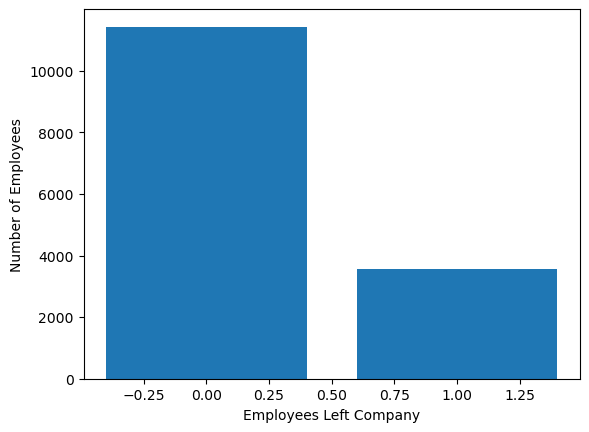

In [280]:
left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

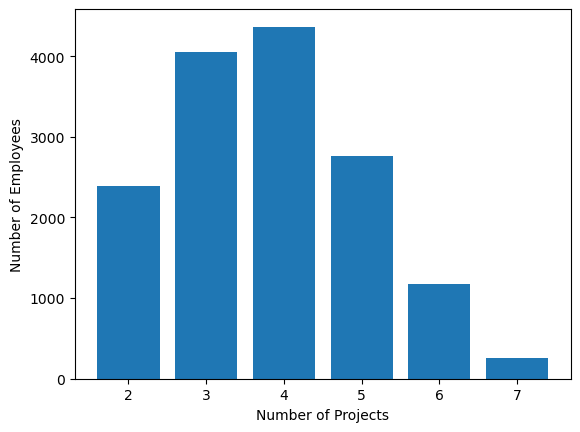

In [281]:
num_projects = data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

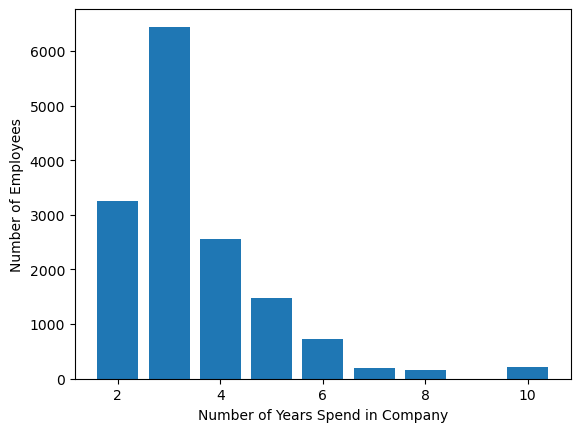

In [282]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In [283]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Applying K Means Clustering

In [284]:
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

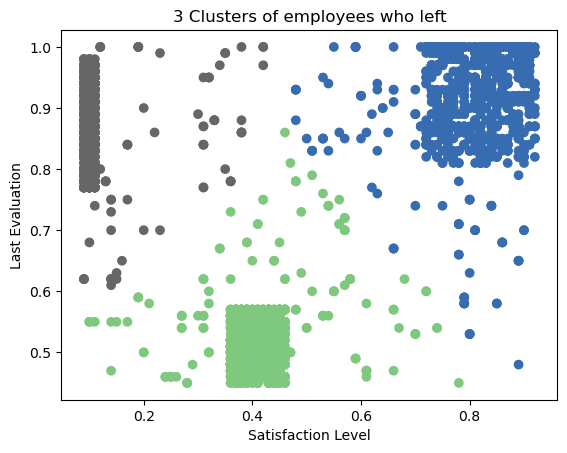

In [285]:
left_emp['label'] = kmeans.labels_
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

(i) High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners."

(ii) Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.

(iii) Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

## Pre-processing the data

In [286]:
le = preprocessing.LabelEncoder()
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

## Training the model

In [287]:
x=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [288]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  

## Applying Gradient Boosting Classifier

In [289]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [290]:
gb_y_train_pred = gb.predict(x_train)
gb_y_test_pred = gb.predict(x_test)

In [291]:
gb_y_train_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [292]:
gb_y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Applying Logistic Regression

In [295]:
from sklearn.linear_model import LogisticRegression  
lr= LogisticRegression(random_state=0)  
lr.fit(x_train, y_train) 

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [296]:
lr_y_train_pred = lr.predict(x_train)
lr_y_test_pred = lr.predict(x_test)

In [297]:
lr_y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [298]:
lr_y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Applying Random Forest Classification

In [306]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
rf.fit(x_train,y_train)

RandomForestClassifier()

In [307]:
rf_y_train_pred = lr.predict(x_train)
rf_y_test_pred = lr.predict(x_test)


In [308]:
rf_y_train_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
rf_y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Evaluating accuracy

In [313]:
a = rf.score(x_test,y_test) # For Random Forest

0.988

In [315]:
b = lr.score(x_test, y_test) # For Logistic Regression

0.7595555555555555

In [316]:
c = gb.score(x_test, y_test) # For Gradient Boosting

0.9715555555555555

## Conclusion

In conclusion, after employing logistic regression, random forest, and gradient boosting models to predict employee churn, it was found that the random forest model yielded the highest accuracy among the three. This suggests that the random forest algorithm may be the most suitable for predicting employee churn in this context.